<a href="https://colab.research.google.com/github/roshitha-nair/Decison-tree/blob/main/Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and Prepare the Data**

In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/bank.csv')
data = pd.read_csv('bank.csv', sep=';')
# Preview the data
print(data.head())
print(data.info())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #  

**Preprocess the Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Encode the target variable
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])  # 'yes' -> 1, 'no' -> 0

# One-hot encode categorical features
data_encoded = pd.get_dummies(data, drop_first=True)

# Split into features (X) and target (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Build the Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


**Evaluate the Model**

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8695652173913043

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1205
           1       0.42      0.44      0.43       152

    accuracy                           0.87      1357
   macro avg       0.68      0.68      0.68      1357
weighted avg       0.87      0.87      0.87      1357


Confusion Matrix:
 [[1113   92]
 [  85   67]]


**Visualize the Decision Tree**

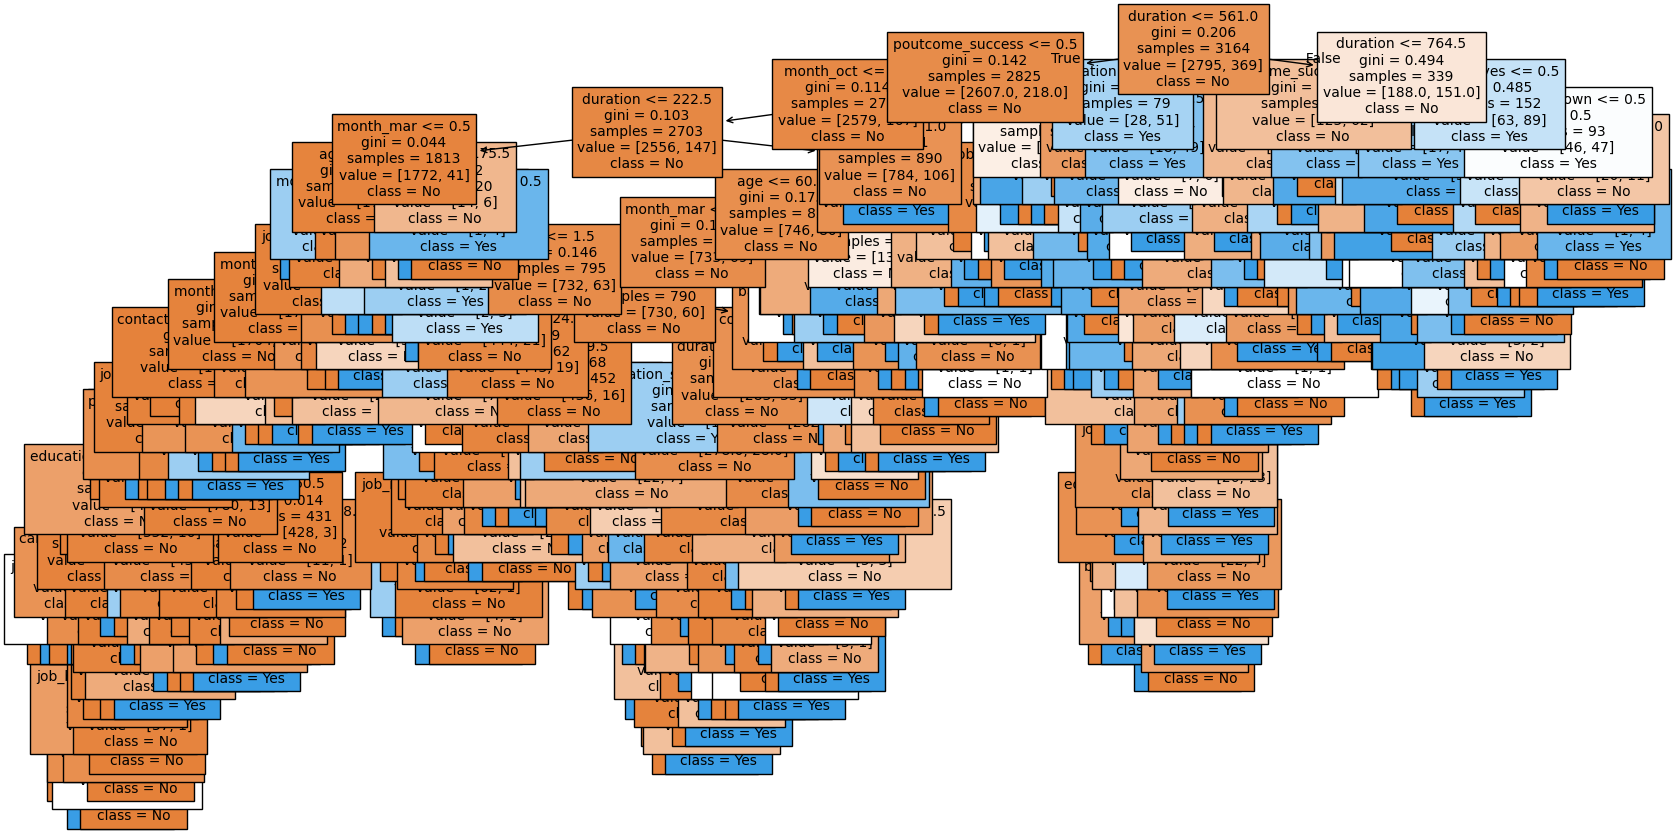

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.show()
